In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
# Helper functions

def getDataMatch(df, col, val):
    return df[df[col] == val]

def getDataGreater(df, col, val):
    return df[df[col] > val]

def getDataLesser(df, col, val):
    return df[df[col] < val]

def returnGrouped(df, groupByCol):
    groupByObj = df.groupby(groupByCol)
    df_grouped = groupByObj.agg({
        'SHOT_NUMBER': 'count',
        'PTS': 'sum',
        'FGM': 'sum'
    }).reset_index()
    return df_grouped

def plotData(combined_data, sortAscending, sortBy, title):
    shooting_percentage_sorted = combined_data.sort_values(by=sortBy, ascending=sortAscending)
    top_shots = shooting_percentage_sorted.head(50)
    
    plt.figure(figsize=(20, 12))
    plt.grid()
    sns.barplot(x='player_name', y='diff', data=top_shots, palette='viridis')
    plt.xlabel('Player Name')
    plt.ylabel('Shooting percentage')
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate player names for better readability
    plt.show()

In [191]:
# Consolidating player data across all games

full_data = pd.read_csv('~/Downloads/shot_logs.csv')
full_data.dropna()

clutch_time = getDataMatch(full_data, 'PERIOD', 4)
non_clutch = getDataLesser(full_data, 'PERIOD', 4)

clutch_stats = returnGrouped(clutch_time, 'player_name')
non_clutch_stats = returnGrouped(non_clutch, 'player_name')

clutch_stats['sp'] = clutch_stats['FGM'] / clutch_stats['SHOT_NUMBER'] * 100
non_clutch_stats['sp'] = non_clutch_stats['FGM'] / non_clutch_stats['SHOT_NUMBER'] * 100

combined_data = pd.merge(clutch_stats, non_clutch_stats, on='player_name')

# Renaming columns to make it easier to interpret
combined_data.rename(columns={
    'SHOT_NUMBER_x': 'SHOT_NUMBER_clutch',
    'PTS_x': 'PTS_clutch',
    'FGM_x': 'FGM_clutch',
    'sp_x': 'sp_clutch',
    'SHOT_NUMBER_y': 'SHOT_NUMBER_non_clutch',
    'PTS_y': 'PTS_non_clutch',
    'FGM_y': 'FGM_non_clutch',
    'sp_y': 'sp_non_clutch'
}, inplace=True)


combined_data['diff'] = combined_data['sp_clutch'] - combined_data['sp_non_clutch']
combined_data['FGM_combined'] = combined_data['FGM_clutch'] + combined_data['FGM_non_clutch']

combined_data

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined
0,aaron brooks,219,221,91,41.552511,336,331,141,41.964286,-0.411774,232
1,aaron gordon,23,23,11,47.826087,79,91,42,53.164557,-5.338470,53
2,al farouq aminu,67,60,28,41.791045,191,188,83,43.455497,-1.664453,111
3,al horford,177,202,100,56.497175,535,577,285,53.271028,3.226147,385
4,al jefferson,163,161,80,49.079755,629,599,299,47.535771,1.543984,379
...,...,...,...,...,...,...,...,...,...,...,...
276,wesley matthews,187,229,86,45.989305,547,606,246,44.972578,1.016727,332
277,wilson chandler,122,112,46,37.704918,601,596,256,42.595674,-4.890756,302
278,zach lavine,101,96,46,45.544554,269,241,111,41.263941,4.280614,157
279,zach randolph,112,109,54,48.214286,549,538,267,48.633880,-0.419594,321


# Without removing any outliers

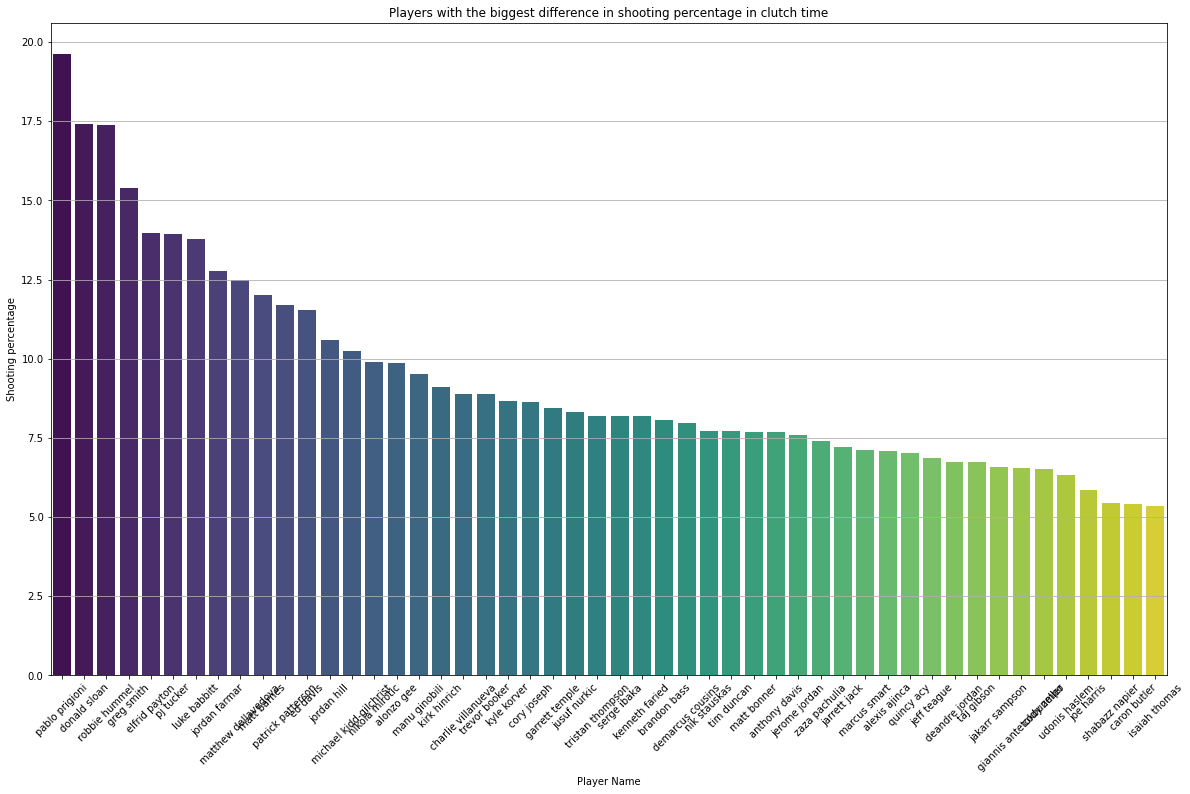

In [192]:
plotData(combined_data, False, 'diff', 'Players with the biggest difference in shooting percentage in clutch time')

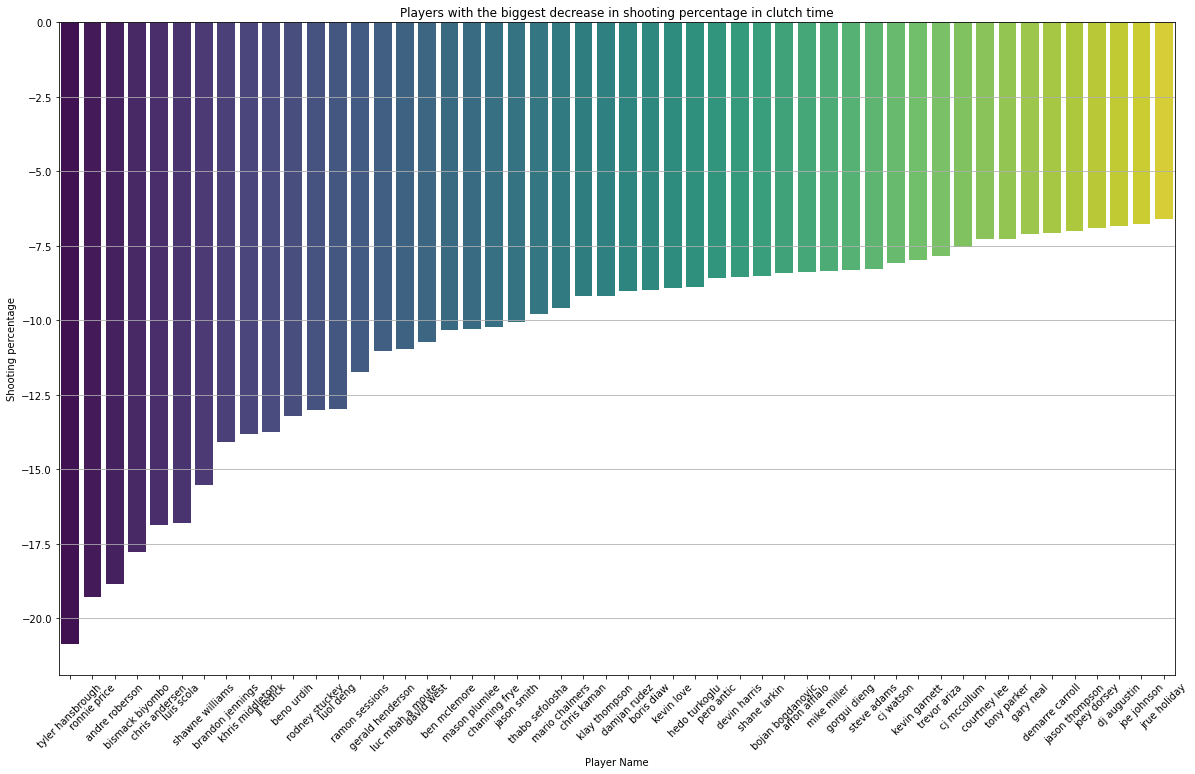

In [193]:
plotData(combined_data, True, 'diff', 'Players with the biggest decrease in shooting percentage in clutch time')

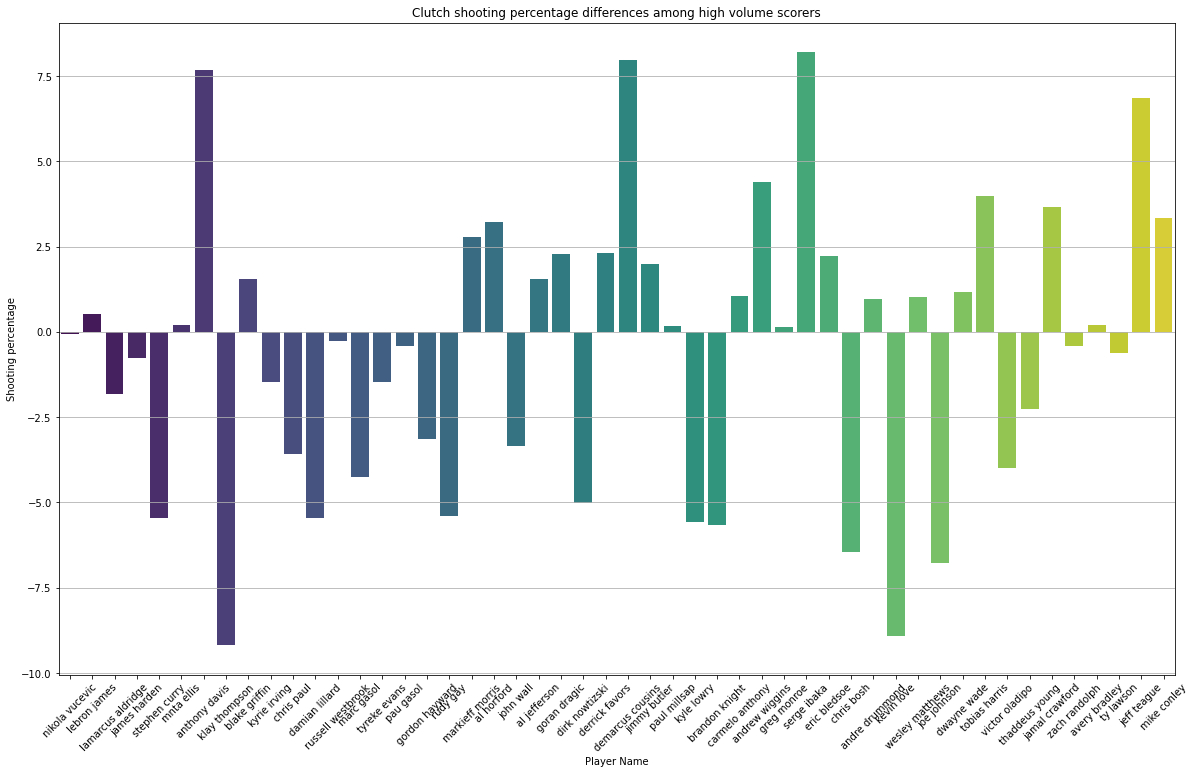

In [194]:
plotData(combined_data, False, 'FGM_combined', 'Clutch shooting percentage differences among high volume scorers')

In [195]:
combined_data[combined_data['player_name'] == 'tyler hansbrough']

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined
267,tyler hansbrough,23,14,7,30.434783,78,81,40,51.282051,-20.847269,47


In [196]:
combined_data[combined_data['player_name'] == 'ramon sessions']

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined
223,ramon sessions,65,36,16,24.615385,154,116,56,36.363636,-11.748252,72


## As you can see, players like Ramon Sessions and Tyler Hansbrough (who have large differences in field goals made in the clutch versus non-clutch time) can be considered as outliers.

Let's remove outliers from the dataset and recreate the above visualizations

In [197]:
combined_data = pd.merge(clutch_stats, non_clutch_stats, on='player_name')

# Renaming columns
combined_data.rename(columns={
    'SHOT_NUMBER_x': 'SHOT_NUMBER_clutch',
    'PTS_x': 'PTS_clutch',
    'FGM_x': 'FGM_clutch',
    'sp_x': 'sp_clutch',
    'SHOT_NUMBER_y': 'SHOT_NUMBER_non_clutch',
    'PTS_y': 'PTS_non_clutch',
    'FGM_y': 'FGM_non_clutch',
    'sp_y': 'sp_non_clutch'
}, inplace=True)

combined_data['diff'] = combined_data['sp_clutch'] - combined_data['sp_non_clutch']
combined_data['FGM_combined'] = combined_data['FGM_clutch'] + combined_data['FGM_non_clutch']

combined_data = getDataGreater(combined_data, 'FGM_clutch', np.median(combined_data['FGM_clutch']))
combined_data = getDataGreater(combined_data, 'FGM_non_clutch', np.median(combined_data['FGM_non_clutch']))

Now, we're only taking into account players who have attempted above the median number of shots for each time period (clutch and non-clutch)

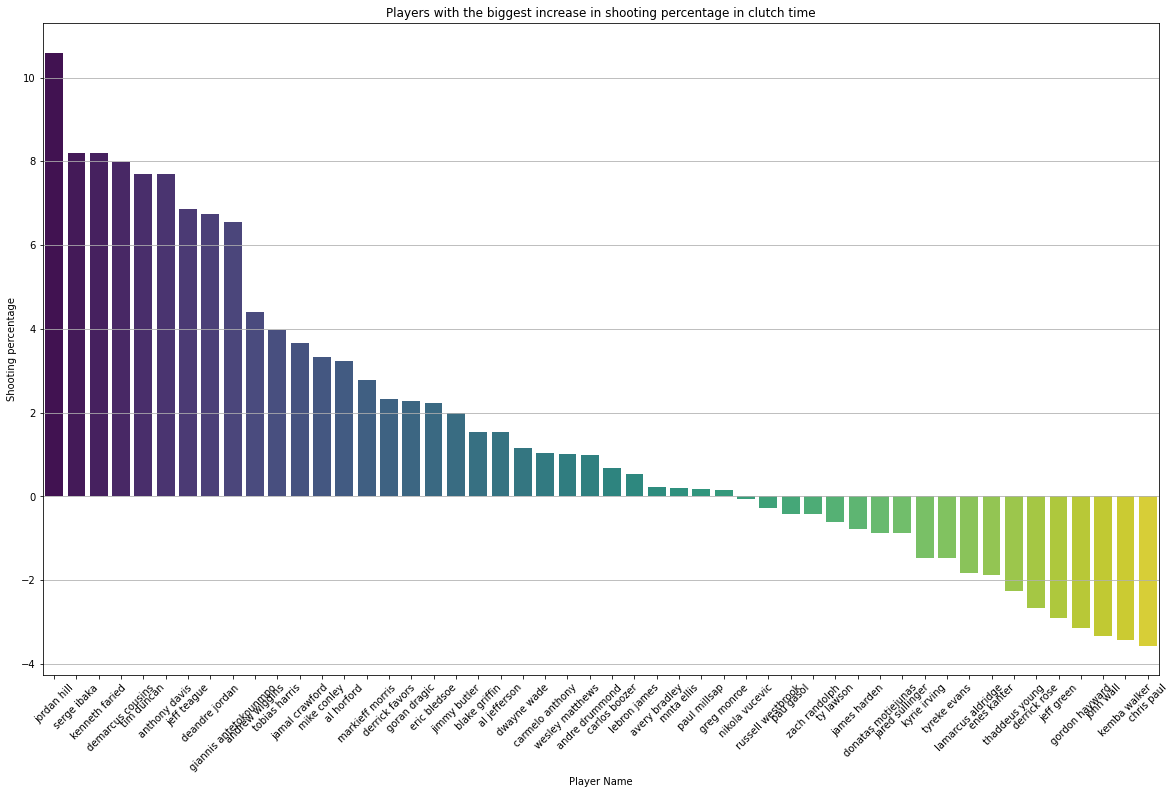

In [198]:
plotData(combined_data, False, 'diff', 'Players with the biggest increase in shooting percentage in clutch time')
# combined_data

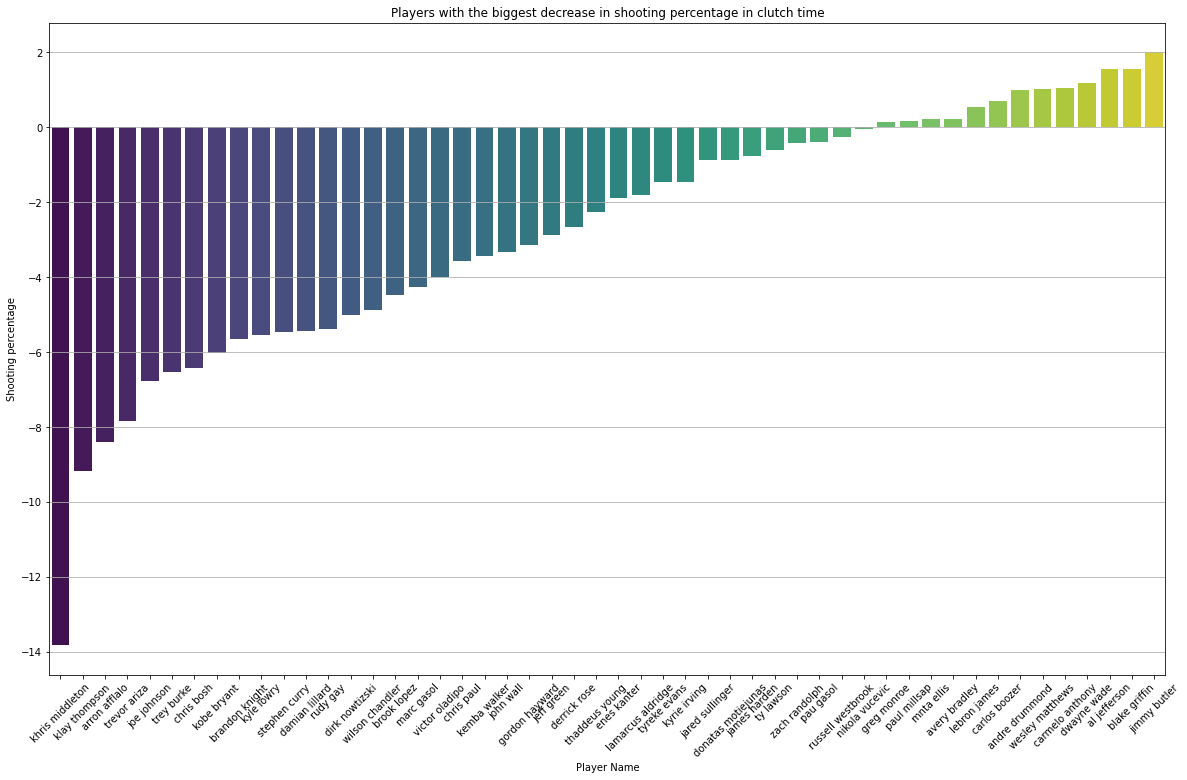

In [199]:
plotData(combined_data, True, 'diff', 'Players with the biggest decrease in shooting percentage in clutch time')

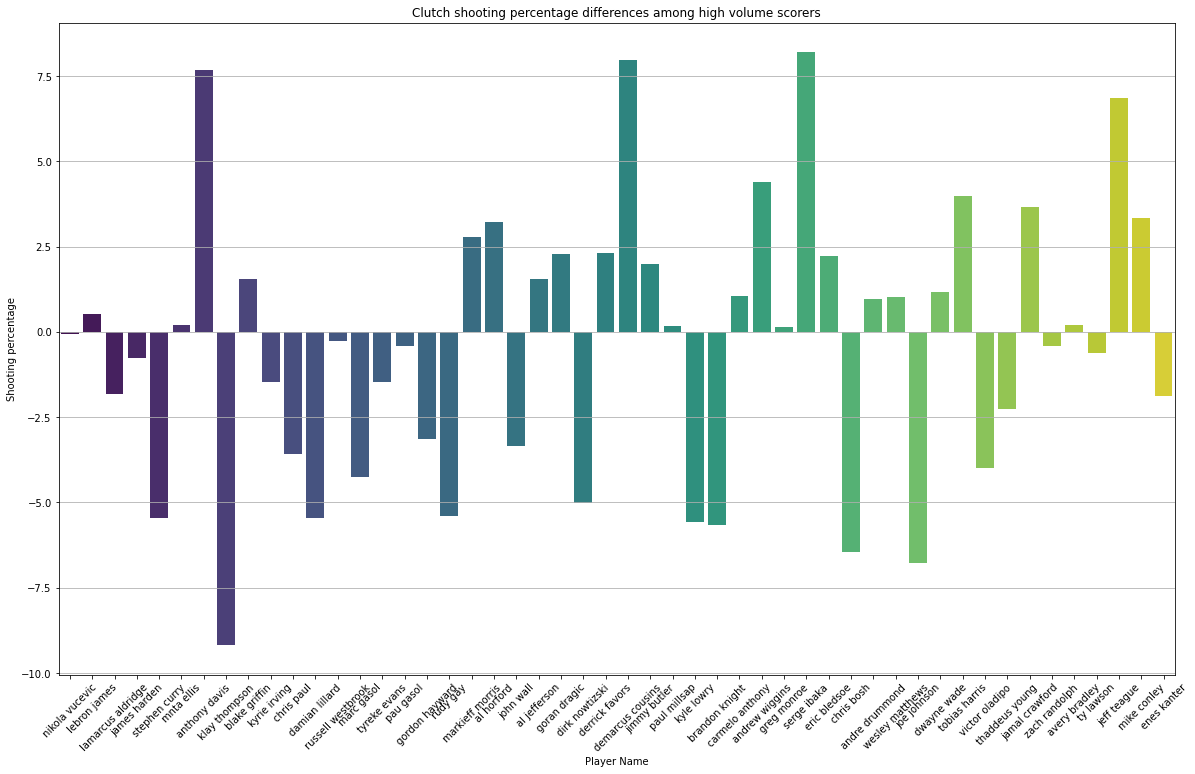

In [200]:
plotData(combined_data, False, 'FGM_combined', 'Clutch shooting percentage differences among high volume scorers')

We've now removed outliers from the data, only taking into account players who have taken an above average number of shots in both clutch and non clutch time. 

However, why do plots 1 and 2 still mostly contain quite a few role players and lesser known stars? Wouldn't we expect mostly the best players in the league to also have close to the best increase in shooting percentage in clutch time, indicating their "clutchness"?

This is because a lot of games end in blowout victories, where teams pull their starters and play their bench players. Let's remove such games and take a look at games that ended in a close score (final margin < 5 points).

In [201]:
full_data = full_data[full_data['FINAL_MARGIN'] < 5]

clutch_time = getDataMatch(full_data, 'PERIOD', 4)
non_clutch = getDataLesser(full_data, 'PERIOD', 4)

cpgroup = clutch_time.groupby('player_name')
clutch_stats = cpgroup.agg({
    'SHOT_NUMBER': 'count',
    'PTS': 'sum',
    'FGM': 'sum'
}).reset_index()

ncpgroup = non_clutch.groupby('player_name')
non_clutch_stats = ncpgroup.agg({
    'SHOT_NUMBER': 'count',
    'PTS': 'sum',
    'FGM': 'sum'
}).reset_index()

clutch_stats['sp'] = clutch_stats['FGM'] / clutch_stats['SHOT_NUMBER'] * 100

non_clutch_stats['sp'] = non_clutch_stats['FGM'] / non_clutch_stats['SHOT_NUMBER'] * 100

combined_data = pd.merge(clutch_stats, non_clutch_stats, on='player_name')

# Renaming columns
combined_data.rename(columns={
    'SHOT_NUMBER_x': 'SHOT_NUMBER_clutch',
    'PTS_x': 'PTS_clutch',
    'FGM_x': 'FGM_clutch',
    'sp_x': 'sp_clutch',
    'SHOT_NUMBER_y': 'SHOT_NUMBER_non_clutch',
    'PTS_y': 'PTS_non_clutch',
    'FGM_y': 'FGM_non_clutch',
    'sp_y': 'sp_non_clutch'
}, inplace=True)

combined_data['diff'] = combined_data['sp_clutch'] - combined_data['sp_non_clutch']
combined_data['FGM_combined'] = combined_data['FGM_clutch'] + combined_data['FGM_non_clutch']

combined_data = getDataGreater(combined_data, 'FGM_clutch', np.median(combined_data['FGM_clutch']))
combined_data = getDataGreater(combined_data, 'FGM_non_clutch', np.median(combined_data['FGM_non_clutch']))

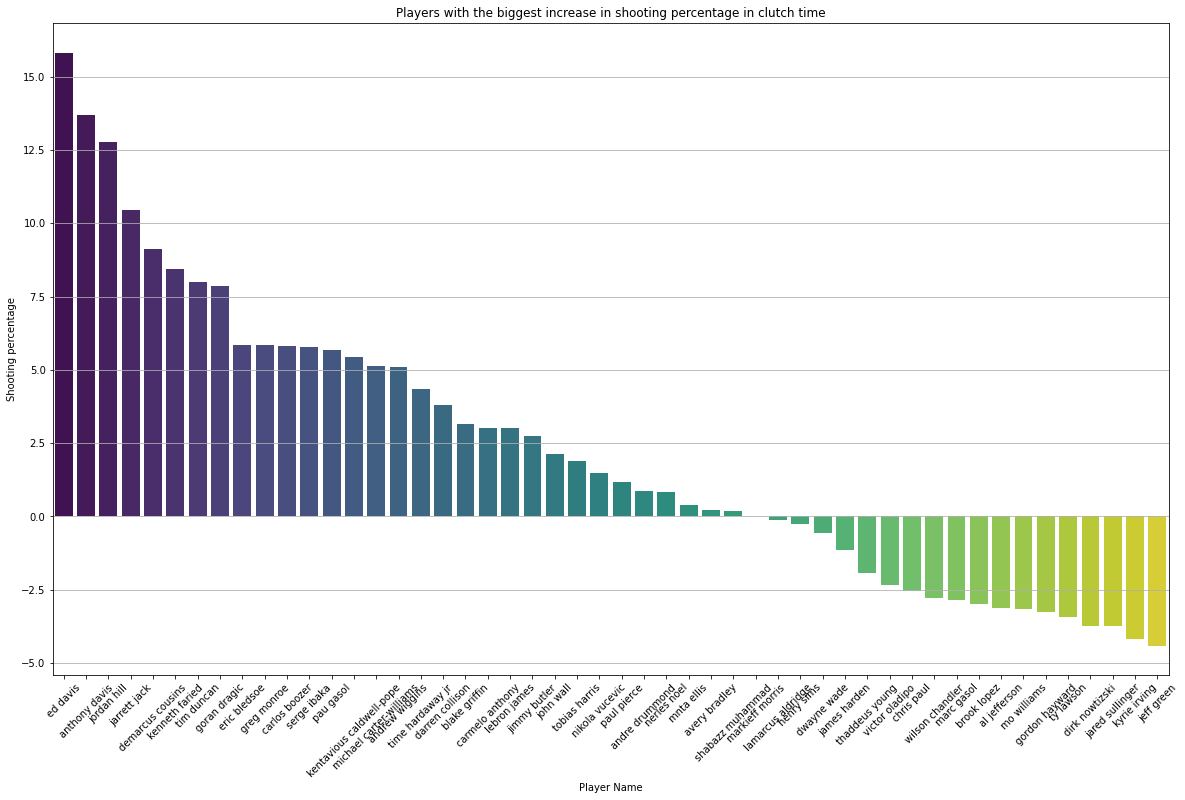

In [202]:
plotData(combined_data, False, 'diff', 'Players with the biggest increase in shooting percentage in clutch time')

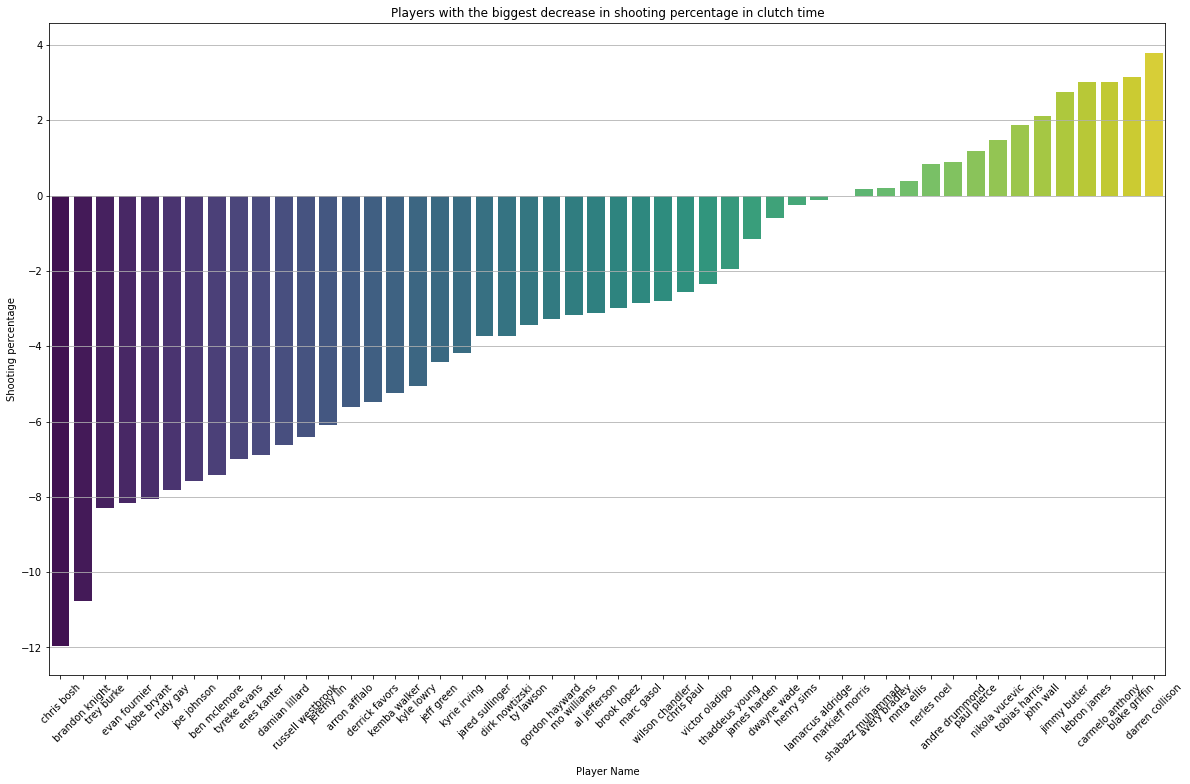

In [203]:
plotData(combined_data, True, 'diff', 'Players with the biggest decrease in shooting percentage in clutch time')

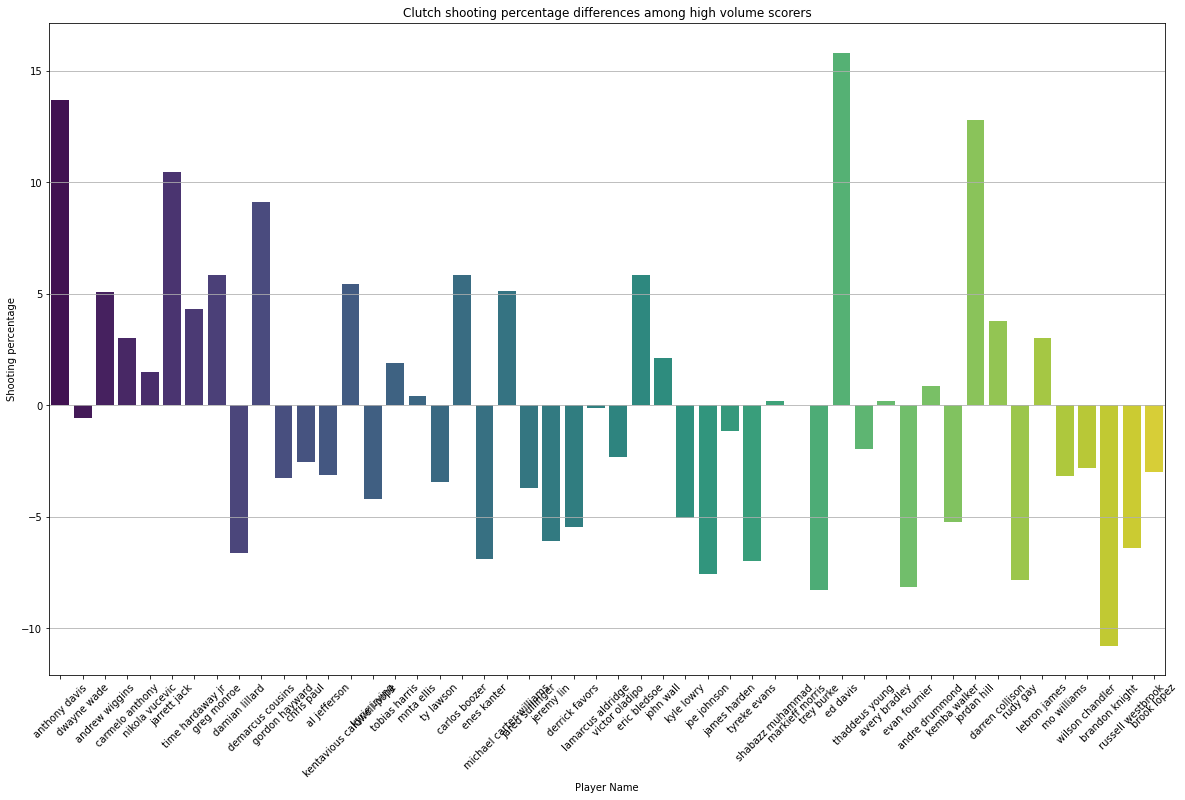

In [204]:
plotData(combined_data, False, 'FGM_clutch', 'Clutch shooting percentage differences among high volume scorers')

Ok, now instead of only looking at the shooting percentages for the highest number of FGM, let's sort by the number of shots attempted.

In [205]:
full_data = pd.read_csv('~/Downloads/shot_logs.csv')
full_data.dropna()

clutch_time = getDataMatch(full_data, 'PERIOD', 4)
non_clutch = getDataLesser(full_data, 'PERIOD', 4)

cpgroup = clutch_time.groupby('player_name')
clutch_stats = cpgroup.agg({
    'SHOT_NUMBER': 'count',
    'PTS': 'sum',
    'FGM': 'sum'
}).reset_index()

ncpgroup = non_clutch.groupby('player_name')
non_clutch_stats = ncpgroup.agg({
    'SHOT_NUMBER': 'count',
    'PTS': 'sum',
    'FGM': 'sum'
}).reset_index()

clutch_stats['sp'] = clutch_stats['FGM'] / clutch_stats['SHOT_NUMBER'] * 100

non_clutch_stats['sp'] = non_clutch_stats['FGM'] / non_clutch_stats['SHOT_NUMBER'] * 100

combined_data = pd.merge(clutch_stats, non_clutch_stats, on='player_name')

# Renaming columns
combined_data.rename(columns={
    'SHOT_NUMBER_x': 'SHOT_NUMBER_clutch',
    'PTS_x': 'PTS_clutch',
    'FGM_x': 'FGM_clutch',
    'sp_x': 'sp_clutch',
    'SHOT_NUMBER_y': 'SHOT_NUMBER_non_clutch',
    'PTS_y': 'PTS_non_clutch',
    'FGM_y': 'FGM_non_clutch',
    'sp_y': 'sp_non_clutch'
}, inplace=True)

combined_data['diff'] = combined_data['sp_clutch'] - combined_data['sp_non_clutch']
combined_data['FGM_combined'] = combined_data['FGM_clutch'] + combined_data['FGM_non_clutch']
combined_data['SHOT_NUMBER_combined'] = combined_data['SHOT_NUMBER_clutch'] + combined_data['SHOT_NUMBER_non_clutch']

combined_data = getDataGreater(combined_data, 'SHOT_NUMBER_clutch', np.median(combined_data['SHOT_NUMBER_clutch']))
combined_data = getDataGreater(combined_data, 'SHOT_NUMBER_non_clutch', np.median(combined_data['SHOT_NUMBER_non_clutch']))

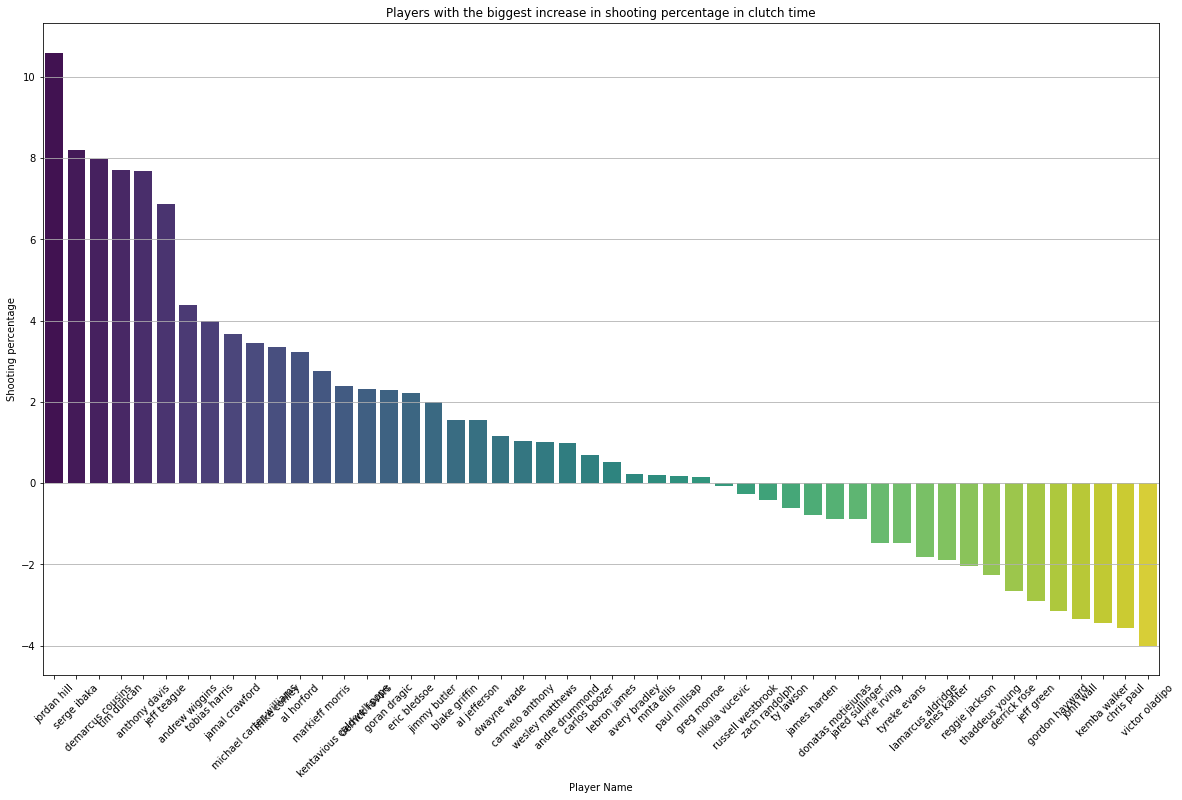

In [206]:
plotData(combined_data, False, 'diff', 'Players with the biggest increase in shooting percentage in clutch time')

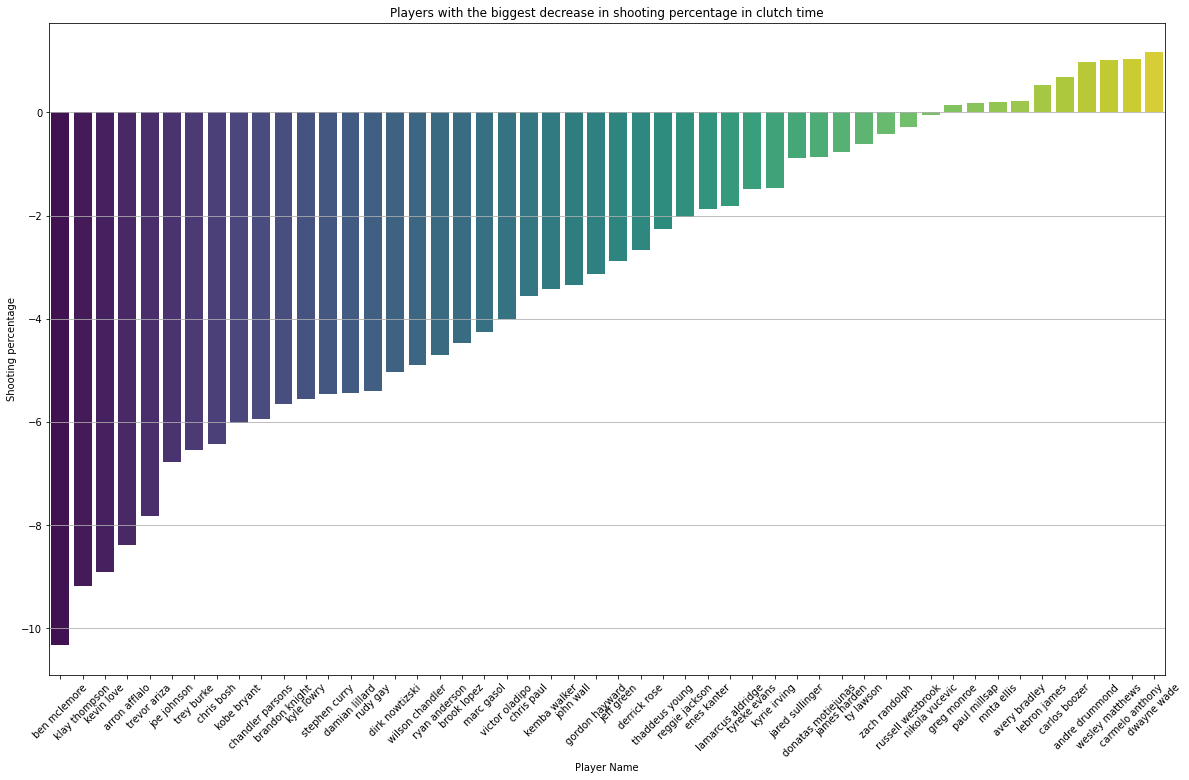

In [207]:
plotData(combined_data, True, 'diff', 'Players with the biggest decrease in shooting percentage in clutch time')

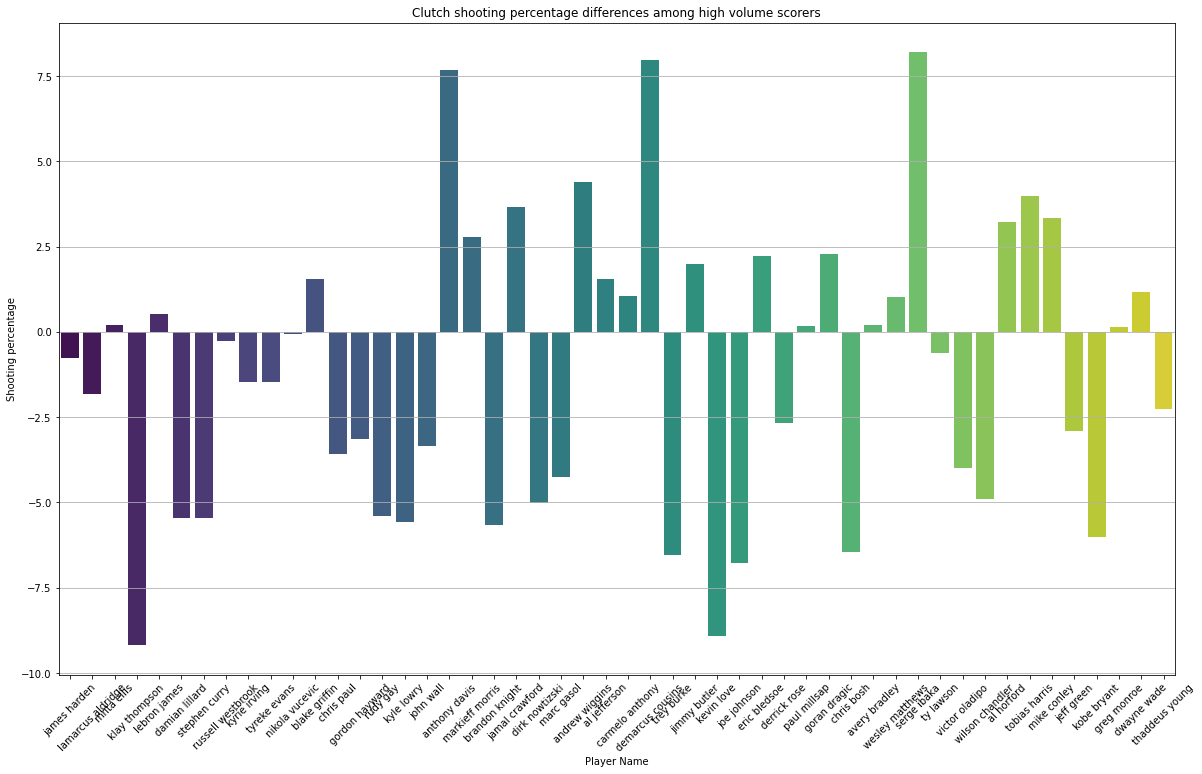

In [208]:
plotData(combined_data, False, 'SHOT_NUMBER_combined', 'Clutch shooting percentage differences among high volume scorers')

Now let's take a look at just the top 5 in each category

In [209]:
def plotData(combined_data, sortAscending, sortBy, count):
    shooting_percentage_sorted = combined_data.sort_values(by=sortBy, ascending=sortAscending)
    top_shots = shooting_percentage_sorted.head(count)
    return top_shots

In [210]:
pos_diff = plotData(combined_data, False, 'diff', 5)
pos_diff

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined,SHOT_NUMBER_combined
139,jordan hill,98,109,54,55.102041,510,454,227,44.509804,10.592237,281,608
238,serge ibaka,112,133,61,54.464286,616,635,285,46.266234,8.198052,346,728
67,demarcus cousins,165,174,87,52.727273,619,556,277,44.749596,7.977677,364,784
254,tim duncan,103,116,58,56.310680,502,489,244,48.605578,7.705102,302,605
19,anthony davis,162,197,98,60.493827,678,716,358,52.802360,7.691467,456,840


In [211]:
neg_diff = plotData(combined_data, True, 'diff', 5)
neg_diff

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined,SHOT_NUMBER_combined
25,ben mclemore,105,92,37,35.238095,474,516,216,45.569620,-10.331525,253,579
157,klay thompson,175,162,68,38.857143,793,913,381,48.045397,-9.188254,449,968
152,kevin love,99,83,35,35.353535,671,691,297,44.262295,-8.908760,332,770
22,arron afflalo,129,108,47,36.434109,551,568,247,44.827586,-8.393478,294,680
262,trevor ariza,144,120,46,31.944444,533,532,212,39.774859,-7.830415,258,677


In [212]:
high_volume = plotData(combined_data, False, 'SHOT_NUMBER_combined', 5)
high_volume

,player_name,SHOT_NUMBER_clutch,PTS_clutch,FGM_clutch,sp_clutch,SHOT_NUMBER_non_clutch,PTS_non_clutch,FGM_non_clutch,sp_non_clutch,diff,FGM_combined,SHOT_NUMBER_combined
108,james harden,195,200,86,44.102564,849,888,381,44.876325,-0.773761,467,1044
167,lamarcus aldridge,190,169,83,43.684211,846,792,385,45.508274,-1.824064,468,1036
198,mnta ellis,226,216,102,45.132743,808,784,363,44.925743,0.207001,465,1034
157,klay thompson,175,162,68,38.857143,793,913,381,48.045397,-9.188254,449,968
171,lebron james,196,212,97,49.489796,772,822,378,48.963731,0.526065,475,968


Extending this last observation to 15 players....

In [213]:
high_volume = plotData(combined_data, False, 'SHOT_NUMBER_combined', 15).sort_values(by='sp_clutch', ascending = True)
high_volume[['player_name', 'sp_non_clutch', 'sp_clutch']]

,player_name,sp_non_clutch,sp_clutch
157,klay thompson,48.045397,38.857143
57,damian lillard,44.573082,39.130435
234,rudy gay,45.903955,40.506329
95,gordon hayward,45.507246,42.372881
269,tyreke evans,43.857143,42.380952
236,russell westbrook,43.363995,43.085106
167,lamarcus aldridge,45.508274,43.684211
247,stephen curry,49.485861,44.021739
108,james harden,44.876325,44.102564
198,mnta ellis,44.925743,45.132743


In [214]:
def convert_name(name):
    parts = name.split()  # Split the name into parts
    capitalized_parts = [part.capitalize() for part in parts]  # Capitalize each part
    return ' '.join(capitalized_parts)  # Join parts back into 'First Last' format

high_volume['player_name'] = high_volume['player_name'].apply(convert_name)

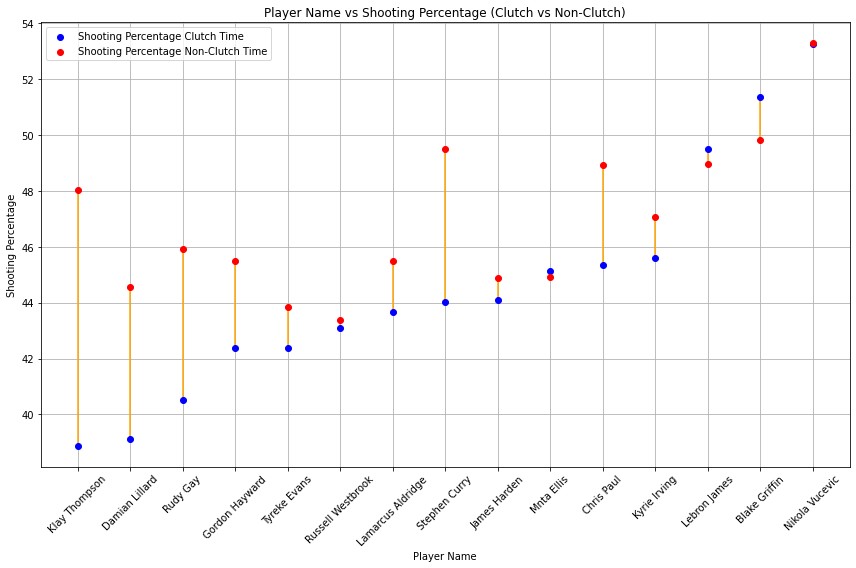

In [215]:
# Plotting
plt.figure(figsize=(12, 8))

# Iterate through each row in the DataFrame
for index, row in high_volume.iterrows():
    player_name = row['player_name']
    sp_clutch = row['sp_clutch']
    sp_non_clutch = row['sp_non_clutch']
    
    # Plotting the line between clutch and non-clutch
    plt.plot([player_name, player_name], [sp_clutch, sp_non_clutch], color='orange', alpha=1)
    
    # Plotting the dots for clutch and non-clutch. no_legend to avoid printing legend each time
    plt.scatter(player_name, sp_clutch, label='_nolegend_', color='blue', zorder=5)
    plt.scatter(player_name, sp_non_clutch, label='_nolegend_', color='red', zorder=5)

# Manually create legend entries and avoid repetition
plt.scatter([], [], color='blue', label='Shooting Percentage Clutch Time')
plt.scatter([], [], color='red', label='Shooting Percentage Non-Clutch Time')

plt.xticks(rotation=45)
plt.xlabel('Player Name')
plt.ylabel('Shooting Percentage')
plt.title('Player Name vs Shooting Percentage (Clutch vs Non-Clutch)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


### Thus, we can see that for the 15 highest volume shooters in clutch time, their shooting percentage mostly decreased slightly or stayed the same, which we would expect as defense gets tighter and the players taking these clutch shots are likely to be the team's best players who are guarded more closely